### Better Prediction With GradientBoost Classifier

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
sns.set()
import pylab
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import f1_score as f1
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv("C:\\Users\\yashw\\Downloads\\train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df['Embarked']=df['Embarked'].replace({'S':0,'C':1,'Q':2})

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1.0


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df=df.drop(columns=['PassengerId','Ticket','Cabin'])

In [13]:
df=df.drop(columns='Name')

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,0.0
1,1,1,female,38.0,1,0,71.2833,1.0
2,1,3,female,26.0,0,0,7.9250,0.0
3,1,1,female,35.0,1,0,53.1000,0.0
4,0,3,male,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0.0
887,1,1,female,19.0,0,0,30.0000,0.0
888,0,3,female,28.0,1,2,23.4500,0.0
889,1,1,male,26.0,0,0,30.0000,1.0


In [15]:
df['Sex']=df['Sex'].replace({'male':0,'female':1})

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,28.0,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [19]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,28.0,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [21]:
df['Embarked']=df['Embarked'].astype(int)

In [22]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
X=df.drop(columns='Survived')
Y=df['Survived']

In [24]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(X, Y)


print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({0: 549, 1: 342})
Resample dataset shape Counter({0: 549, 1: 549})


In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))


Original dataset shape Counter({0: 549, 1: 342})
Resample dataset shape Counter({0: 549, 1: 549})


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.20,random_state=21)

## Applying AdaBoost Classifier

In [27]:
lm=AdaBoostClassifier()
lm.fit(x_train,y_train)

AdaBoostClassifier()

In [28]:
y_pred=lm.predict(x_test)

In [29]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [30]:
accuracy_score(y_test,y_pred)

0.7818181818181819

In [31]:
confusion_matrix(y_test,y_pred)

array([[85, 22],
       [26, 87]], dtype=int64)

In [32]:
f1(y_test,y_pred,average='weighted')

0.7818542479092938

In [33]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [34]:
auc = roc_auc_score(y_test,y_pred)
auc

0.7821520138946324

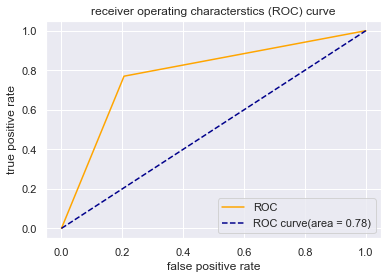

In [35]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

## Appyling GradientBoost Classifier

In [36]:
lm=GradientBoostingClassifier()
lm.fit(x_train,y_train)

GradientBoostingClassifier()

In [37]:
y_pred=lm.predict(x_test)

In [38]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [39]:
accuracy_score(y_test,y_pred)

0.8409090909090909

In [40]:
confusion_matrix(y_test,y_pred)

array([[96, 11],
       [24, 89]], dtype=int64)

In [41]:
f1(y_test,y_pred,average='weighted')

0.8406096705718225

In [42]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [43]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8424034405756348

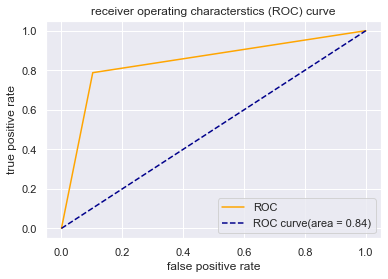

In [44]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

## Applying XGBoost Classifier

In [45]:
lm=XGBClassifier()
lm.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [46]:
y_pred=lm.predict(x_test)

In [47]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [48]:
accuracy_score(y_test,y_pred)

0.8363636363636363

In [49]:
confusion_matrix(y_test,y_pred)

array([[90, 17],
       [19, 94]], dtype=int64)

In [50]:
f1(y_test,y_pred)

0.8392857142857143

In [51]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [52]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8364899512033743

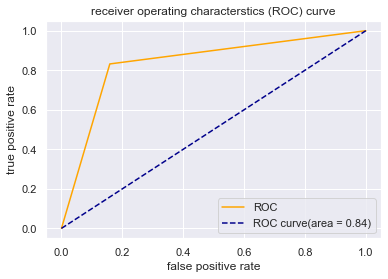

In [53]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

## Applying CatBoost Classifier

In [54]:
lm=CatBoostClassifier()
lm.fit(x_train,y_train)

Learning rate set to 0.009746
0:	learn: 0.6866755	total: 232ms	remaining: 3m 51s
1:	learn: 0.6803015	total: 236ms	remaining: 1m 58s
2:	learn: 0.6745418	total: 242ms	remaining: 1m 20s
3:	learn: 0.6682192	total: 247ms	remaining: 1m 1s
4:	learn: 0.6622260	total: 251ms	remaining: 50s
5:	learn: 0.6564503	total: 256ms	remaining: 42.4s
6:	learn: 0.6512221	total: 267ms	remaining: 37.8s
7:	learn: 0.6461457	total: 271ms	remaining: 33.6s
8:	learn: 0.6410784	total: 277ms	remaining: 30.5s
9:	learn: 0.6359301	total: 282ms	remaining: 27.9s
10:	learn: 0.6322904	total: 286ms	remaining: 25.7s
11:	learn: 0.6271017	total: 303ms	remaining: 24.9s
12:	learn: 0.6224916	total: 307ms	remaining: 23.3s
13:	learn: 0.6184318	total: 310ms	remaining: 21.8s
14:	learn: 0.6152508	total: 312ms	remaining: 20.5s
15:	learn: 0.6110470	total: 317ms	remaining: 19.5s
16:	learn: 0.6068701	total: 322ms	remaining: 18.6s
17:	learn: 0.6020967	total: 327ms	remaining: 17.8s
18:	learn: 0.5978950	total: 331ms	remaining: 17.1s
19:	learn:

In [55]:
y_pred=lm.predict(x_test)

In [56]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
      dtype=int64)

In [57]:
accuracy_score(y_test,y_pred)

0.8363636363636363

In [58]:
confusion_matrix(y_test,y_pred)

array([[94, 13],
       [23, 90]], dtype=int64)

In [59]:
f1(y_test,y_pred)

0.8333333333333334

In [60]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [61]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8374824249441734

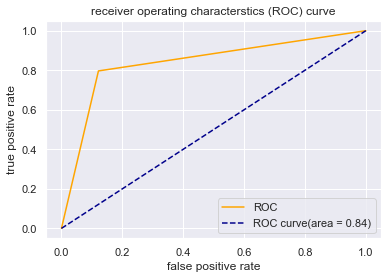

In [62]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

## Applying lightBoost Classifier

In [63]:
lm=LGBMClassifier()
lm.fit(x_train,y_train)

LGBMClassifier()

In [64]:
y_pred=lm.predict(x_test)

In [65]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
      dtype=int64)

In [66]:
accuracy_score(y_test,y_pred)

0.8181818181818182

In [67]:
confusion_matrix(y_test,y_pred)

array([[91, 16],
       [24, 89]], dtype=int64)

In [68]:
f1(y_test,y_pred)

0.81651376146789

In [69]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [70]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8190389545943264

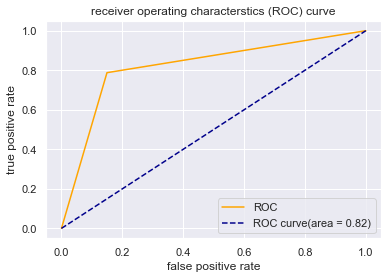

In [71]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()